## Dataset generation from deformable mirror and GRIN fiber

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from mmfsim.grid import Grid
from mmfsim.fiber import StepIndexFiber
from mmfsim.datasets import SimulatedStepIndexSpeckleOutputDataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
grid = Grid(pixel_size=5e-6, pixel_numbers=(128,128))
fiber = StepIndexFiber(radius=26e-6, wavelength=532e-9, n1=1.465, n2=1.445)
coupling_matrix = fiber.modes_coupling_matrix(complex=complex, full=True, degen=True)
print(fiber)

c:\users\saucourt\coding\mmf_lp_modes\mmfsim\fiber.py:176: RuntimeWarning: invalid value encountered in divide
  return sp.jv(n, u) / (u * sp.jv(n - 1, u)) + sp.kn(n, w) / (w * sp.kn(n - 1, w))
c:\users\saucourt\coding\mmf_lp_modes\mmfsim\fiber.py:175: RuntimeWarning: invalid value encountered in sqrt
  w = np.sqrt(v**2 - u**2)


StepIndexFiber instance with:
  - Radius: 26.0 um
  - Core index: 1.465
  - Cladding index: 1.445
  - Wavelength: 532.0 nm
  - Numerical aperture: 0.241
  - Number of guided LP modes: 699
  - Number of guided LP modes (counting degenerates): 1374
  - First 10 LP_n,m modes characteristics:
  n_eff      h          n          m
[[ 1.46497962  0.          0.          1.        ]
 [ 1.46494826  2.          1.          1.        ]
 [ 1.46490706  4.          2.          1.        ]
 [ 1.46489263  1.          0.          2.        ]
 [ 1.46485656  6.          3.          1.        ]
 [ 1.46482656  3.          1.          2.        ]
 [ 1.46479709  8.          4.          1.        ]
 [ 1.46475034  5.          2.          2.        ]
 [ 1.46473611  2.          0.          3.        ]
 [ 1.46472887 10.          5.          1.        ]]


In [37]:
dset = SimulatedStepIndexSpeckleOutputDataset(fiber, grid, length=2000, N_modes=fiber._N_modes_degen, degen=True, noise_std=0/100)
dset._coupling_matrix = coupling_matrix
dset.compute_from_transfer_matrix(phases_dim=(12,12))

c:\users\saucourt\coding\mmf_lp_modes\mmfsim\coupling.py:50: RuntimeWarning: invalid value encountered in divide
  self.field = self.field / self.energy


KeyboardInterrupt: 

In [32]:
dset.compute_fourier_transforms(pad=1)

Computed Fourier 1/2000
Computed Fourier 2/2000
Computed Fourier 3/2000
Computed Fourier 4/2000
Computed Fourier 5/2000
Computed Fourier 6/2000
Computed Fourier 7/2000
Computed Fourier 8/2000
Computed Fourier 9/2000
Computed Fourier 10/2000
Computed Fourier 11/2000
Computed Fourier 12/2000
Computed Fourier 13/2000
Computed Fourier 14/2000
Computed Fourier 15/2000
Computed Fourier 16/2000
Computed Fourier 17/2000
Computed Fourier 18/2000
Computed Fourier 19/2000
Computed Fourier 20/2000
Computed Fourier 21/2000
Computed Fourier 22/2000
Computed Fourier 23/2000
Computed Fourier 24/2000
Computed Fourier 25/2000
Computed Fourier 26/2000
Computed Fourier 27/2000
Computed Fourier 28/2000
Computed Fourier 29/2000
Computed Fourier 30/2000
Computed Fourier 31/2000
Computed Fourier 32/2000
Computed Fourier 33/2000
Computed Fourier 34/2000
Computed Fourier 35/2000
Computed Fourier 36/2000
Computed Fourier 37/2000
Computed Fourier 38/2000
Computed Fourier 39/2000
Computed Fourier 40/2000
Computed 

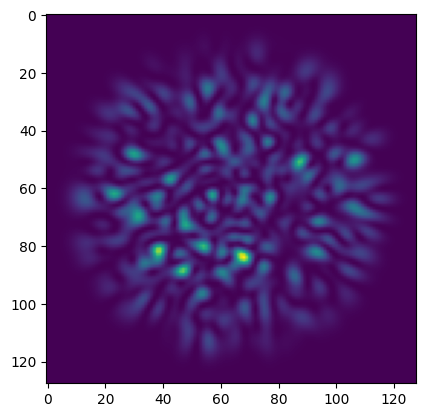

In [33]:
ridx = np.random.randint(0, dset._fields.shape[-1])
plt.imshow(dset[ridx])

In [35]:
dset.export(return_output_fields=True, add_exp_noise=True, noise_func=np.max, file_type='matlab')

Dataset saved: .\synth_dset_grin_Nmodes=350_degen=True_len=2000_mirr=36_exp_noise.mat
